# kNN basic practice

## sklearn.neighbors

docs: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

examples: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [177]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 

import numpy as np

In [178]:
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Toy task - only 2 features

In [179]:
classification_problem = datasets.make_classification(
    n_samples=100, 
    n_features =2, 
    n_informative = 2, 
    n_classes = 3, 
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=3
)

In [180]:
len(classification_problem[0])

100

In [181]:
classification_problem[0][:,0] # array with the first features


array([ 2.21886651,  2.07169996, -1.93977262,  2.08436759,  0.94998372,
       -0.3878893 ,  1.98118534,  1.65508134,  2.60996691, -0.29137472,
       -0.98418733, -0.15399877, -0.22167729,  2.88285048,  1.17459743,
       -0.31704075,  1.48023527,  1.51863252, -0.7044121 ,  1.06060558,
        3.04237626, -1.60671473, -0.2410213 ,  1.88783328,  0.1286542 ,
       -1.68428971, -0.7699091 ,  3.06365602, -1.06474935, -0.34416853,
        2.13404983,  1.12563852,  2.000055  ,  2.07135111,  0.80113229,
        2.62368333,  1.09390904, -0.1183851 ,  1.17333444, -1.1156508 ,
       -0.81128541, -0.28911786,  3.45454483,  0.02133037,  0.59841259,
        0.99792686, -0.85644943, -1.64094355,  1.61122064, -0.47741667,
       -1.10545981, -1.32837543, -1.40997215, -0.63517453, -1.66026857,
       -2.08667919, -1.01112963,  1.05504391,  1.56089307, -1.02077644,
        1.23337839,  1.82285256, -0.61454121,  0.06002548, -1.90919636,
        0.02749183,  1.2933655 , -0.79602966, -0.06295081,  0.50

In [182]:
# plt.scatter(first_feature, second_feature, answers, number_of_elements)

In [183]:
def plot_dataset(dataset):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    plt.figure(figsize=(16, 9))
    plt.grid()
    plt.scatter(dataset[0][:,0], dataset[0][:,1], 
                  c=dataset[1], cmap=colors, s=100)
    plt.show()

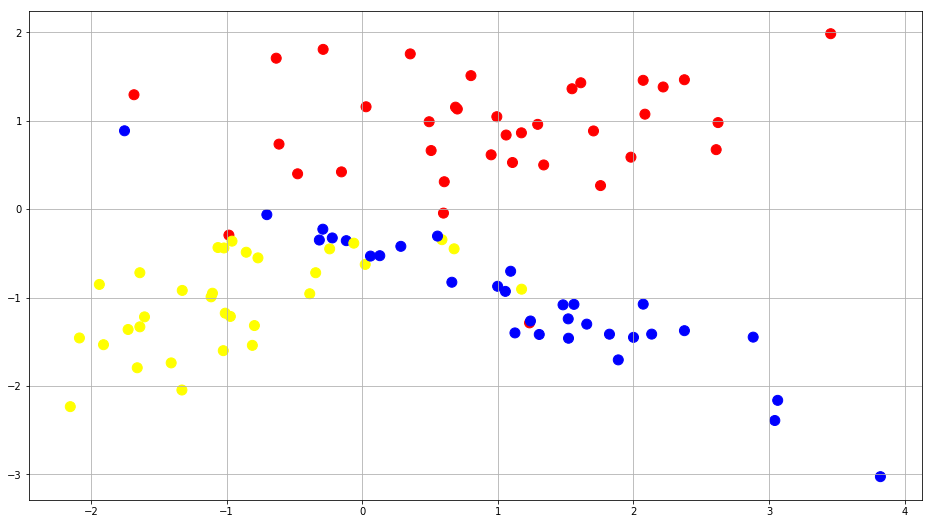

In [184]:
plot_dataset(classification_problem)

In [185]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size = 0.3,
    random_state = 18
)

# Let's build our model!

In [186]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [187]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.93333333333333335

In [188]:
predictions

array([0, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 2, 0])

### And visualize

In [189]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [190]:
xx, yy = get_meshgrid(train_data)
train_data

array([[ 0.99792686, -0.87150485],
       [-0.1183851 , -0.35544532],
       [ 0.99198476,  1.0465677 ],
       [ 1.65508134, -1.29954273],
       [ 1.10752442,  0.5284127 ],
       [-1.1156508 , -0.9907937 ],
       [ 1.54666436,  1.36255256],
       [ 0.35349941,  1.7568708 ],
       [ 1.24014399, -1.26401561],
       [ 0.5544552 , -0.30371376],
       [ 1.05504391, -0.92904441],
       [ 0.70062503,  1.13342295],
       [ 3.06365602, -2.16142073],
       [ 2.000055  , -1.44905962],
       [-1.02570858, -1.59946684],
       [ 1.23337839, -1.28522633],
       [ 1.17333444,  0.8640935 ],
       [-1.32837543, -0.91830056],
       [-0.7699091 , -0.5500474 ],
       [-0.28911786,  1.80794921],
       [ 1.82285256, -1.41324137],
       [ 2.62368333,  0.97996059],
       [ 0.06002548, -0.52987444],
       [-1.01112963, -1.17566007],
       [-0.2410213 , -0.44815041],
       [-0.34416853, -0.71806993],
       [-1.68428971,  1.29496961],
       [ 0.80113229,  1.51109105],
       [ 1.7049971 ,

In [191]:
xx.ravel()

array([-2.65412795, -2.60412795, -2.55412795, ...,  3.84587205,
        3.89587205,  3.94587205])

In [192]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels):
    colors = ListedColormap(['red', 'blue', 'yellow'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
    
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

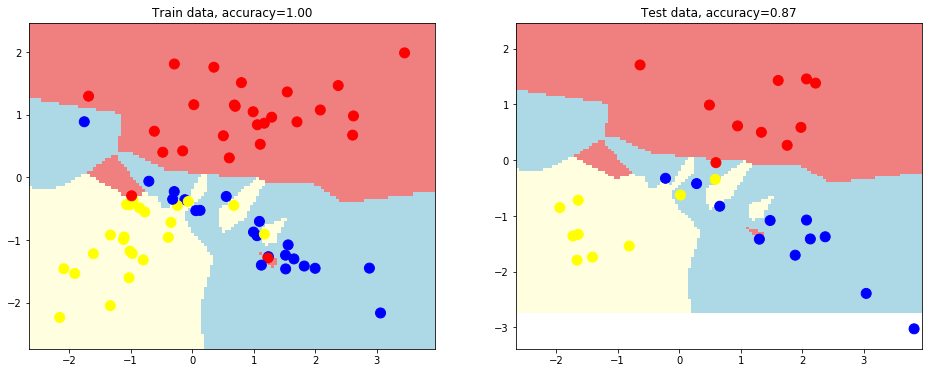

In [193]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

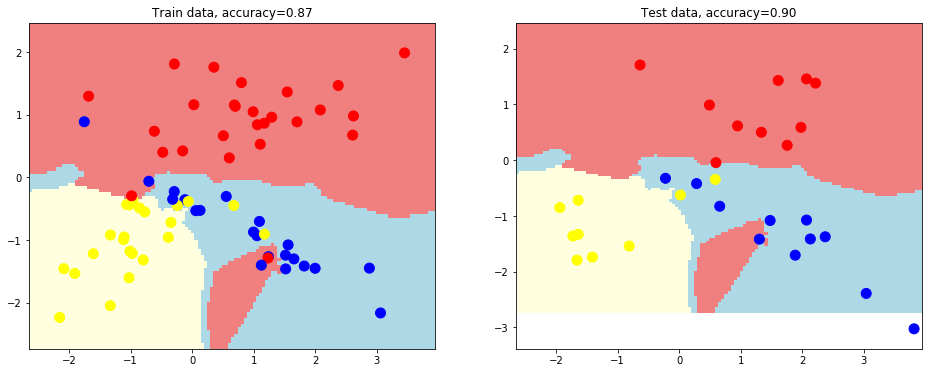

In [194]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

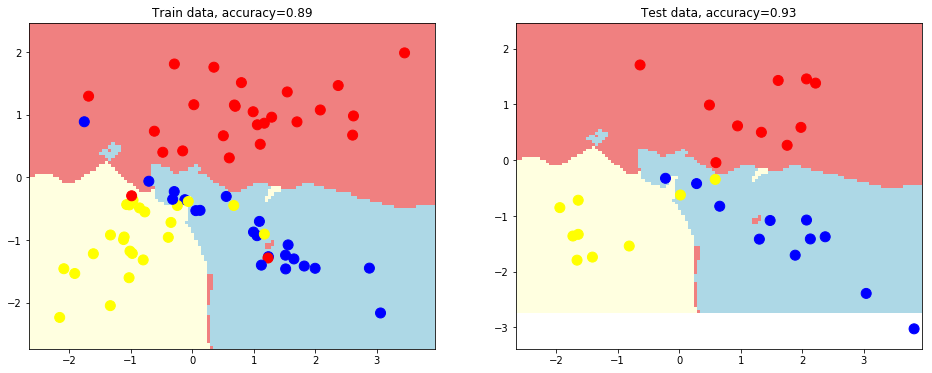

In [195]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

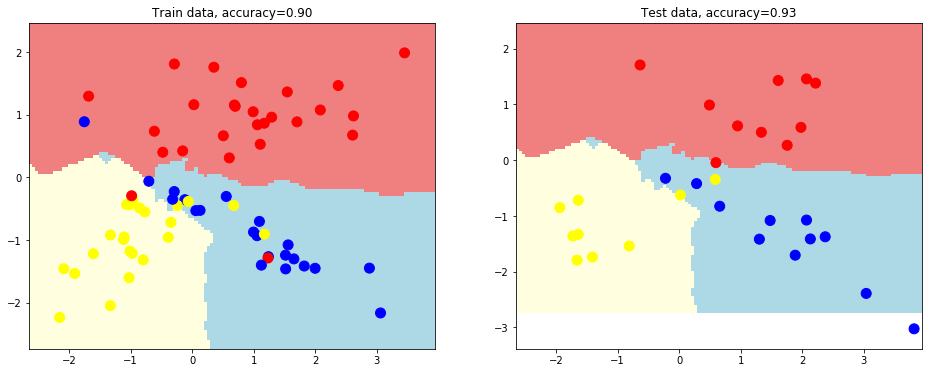

In [196]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

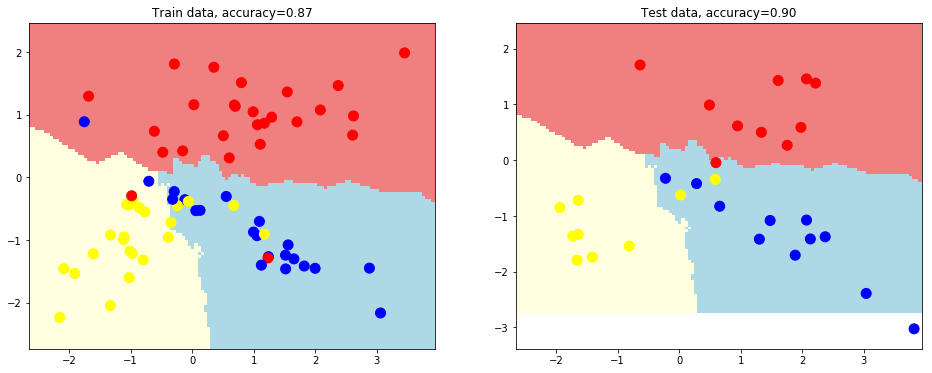

In [197]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

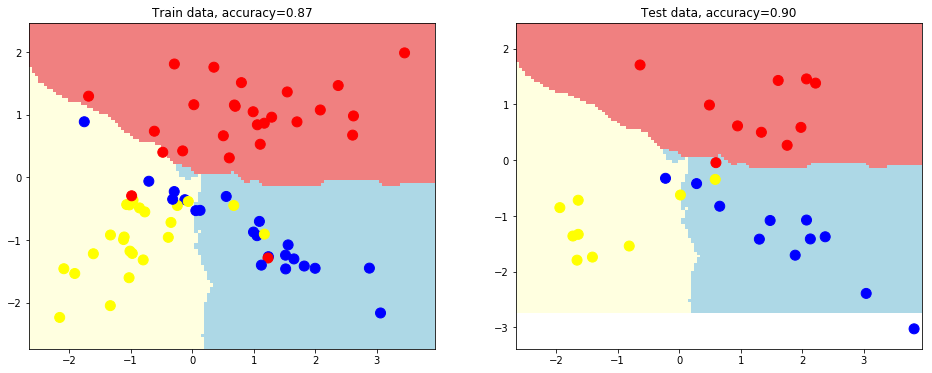

In [198]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

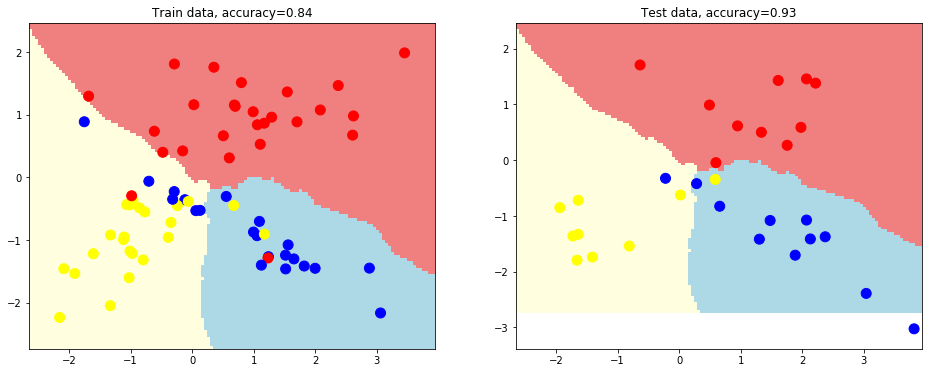

In [199]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

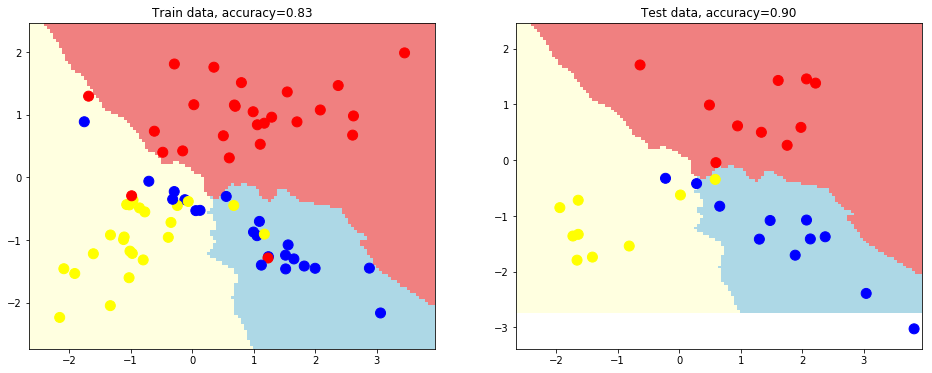

In [200]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## Seems good!

In [201]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50, 
    n_classes=3,
    n_redundant=50, 
    n_clusters_per_class=1,
    random_state=42
)

In [202]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(hard_problem[0], 
                                                                                     hard_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [203]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [204]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.59999999999999998

## Or not so good...

In [205]:
def train_knn_classifier(dimensions, n_classes):
    scores = []
    
    for dim in dimensions:
        problem = datasets.make_classification(n_samples=1000, n_features=dim, n_informative=dim // 2, 
                                               n_classes=5, n_redundant=dim // 2, 
                                               n_clusters_per_class=1, random_state=42)
        
        train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
            problem[0],
            problem[1],
            test_size=0.3,
            random_state=1
        )
        
        clf = neighbors.KNeighborsClassifier(n_neighbors=5)
        clf.fit(train_data, train_labels)
        
        predictions = clf.predict(test_data)
        acc = metrics.accuracy_score(test_labels, predictions)
        
        scores.append(acc)
        
    plt.figure(figsize=(16, 9))
    plt.plot(dimensions, scores)
    plt.show()

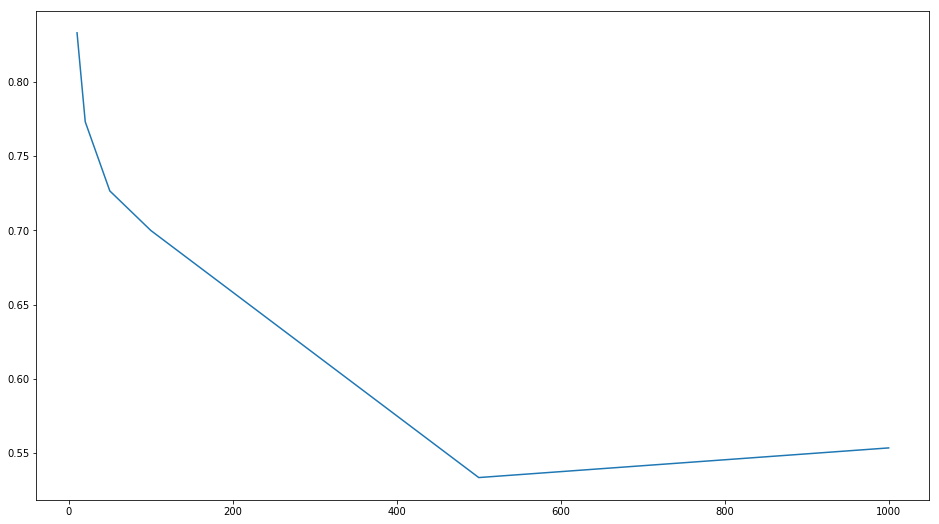

In [206]:
train_knn_classifier([10, 20, 50, 100, 500, 1000], 5)

# Practice area

Now let's try and train a simple (or not so) kNN classifier on a more complicated dataset.

In [207]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data > ./wine_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10782  100 10782    0     0   5391      0  0:00:02  0:00:02 --:--:--  3884


In [208]:
import pandas as pd

In [209]:
dataset = pd.read_csv('wine_data.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [210]:
X = dataset.drop(0, axis=1).as_matrix()
y = dataset[0].as_matrix()

In [211]:
from sklearn.metrics import accuracy_score

def measure_quality(predictions):
    return accuracy_score(y_test, predictions)

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(142, 13)
(36, 13)


In [213]:
def fit_and_measure(n_nei=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_nei)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return measure_quality(y_pred)


In [214]:
def train_and_show_knn():
    scores = []
    n_neighbors = []
    
    score = 0
    max_score = 0
    for i in range(1, 143):
        score = fit_and_measure(i)
        max_score = max(score, max_score)
        scores.append(score)
        n_neighbors.append(i)
    print("max_score = {}".format(str(max_score)))
        
    plt.figure(figsize=(16, 9))
    plt.plot(n_neighbors, scores)
    plt.show()

In [215]:
score = 0
max_score = 0
for i in range(1, 143):
    score = fit_and_measure(i)
    max_score = max(score, max_score)
print("max_score = {}".format(str(max_score)))

max_score = 0.833333333333


# Bonus area
### Those who get accuracy of at least 0.8 get bonus [0.5 max]

max_score = 0.833333333333


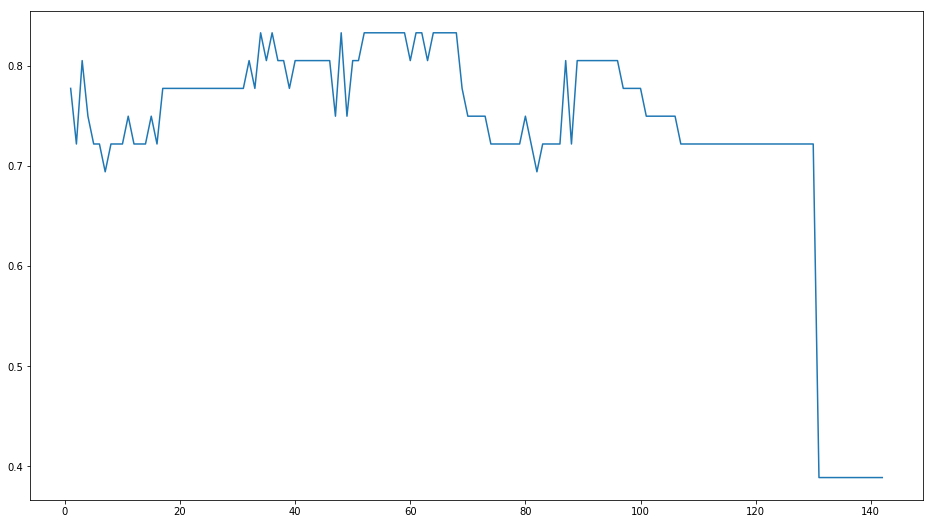

In [216]:
train_and_show_knn()

In [217]:
# print(measure_quality(y_pred))

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


In [219]:
# Lets try fitting our model using only 0 < k <= 13 features

def obtain_feature(n, features):
    return features[:, n:n+1]

In [220]:
def fit_and_measure_three_features(features, n_nei=5):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_nei)
    X_train_local = np.hstack(tuple([obtain_feature(i, X_train) for i in features]))
    X_test_local = np.hstack(tuple([obtain_feature(i, X_test) for i in features]))
    
    clf.fit(X_train_local, y_train)
    y_pred = clf.predict(X_test_local)
    return measure_quality(y_pred)


In [221]:
fit_and_measure_three_features((0, 1, 2), n_nei=5)

0.88888888888888884

In [222]:
from itertools import combinations

In [223]:
three_features_combs = list(combinations(range(13), 3))

In [224]:
best_score = 0
best_features = None
best_n_nei = None

In [228]:
for n_nei in range(1, 30):
    for comb in list(three_features_combs):
        score = fit_and_measure_three_features(comb, n_nei=n_nei)
        if score > best_score:
            best_score = score
            best_features = comb
            best_n_nei = n_nei
print(best_score)
print(best_features)
print(best_n_nei)

1.0
(0, 2, 10)
19


In [227]:
# By teaching a model with features (0, 2, 10) with 19 neighbors parameter, 100% accuracy was achieved.